In [58]:
# default libraries
import pathlib
import zipfile

# Import installed libraries
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import tensorflow as tf

# Matplotlib darkmode
plt.style.use('dark_background')

# Styling
plt.rcParams.update({
    "font.size": 14
})


In [59]:
# Read in the level 1 data
cal_df = pd.read_pickle("../data/level1/CDA__CAT_IID_cal_data.pkl")

In [60]:
# unweighted calibration ml model for CAT
iid_qi_cal_df = cal_df.loc[(cal_df["TAR"] == "CAT")
                           & (cal_df["QI_CHARGE"] > 0.0)
                           & (cal_df["QI_TR"] > 0.0)].copy()


# Adding the LOG10 scaled data of the QI channel
iid_qi_cal_df.loc[:, "QI_LOG10_CHARGE"] = np.log10(iid_qi_cal_df["QI_CHARGE"])
iid_qi_cal_df.loc[:, "MASS_LOG10"] = np.log10(iid_qi_cal_df["MASS"])


In [61]:
iid_qi_cal_df


,PSU_VEL,PSU_CHARGE,MP_PEAKS,ACC,QI_CHARGE,QI_TR,QC_CHARGE,QC_TR,QT_CHARGE,QT_TR,TAR,MASS,QI_LOG10_CHARGE,MASS_LOG10
0,17.40,1.260,3,2000000,8.857710,2.83,43.1122,2.33,4.52835,0.00,CAT,1.664685e-17,0.947321,-16.778668
1,12.35,0.990,0,2000000,8.392480,8.16,243.3150,0.66,4.80513,0.00,CAT,2.596338e-17,0.923890,-16.585639
2,18.70,2.030,3,2000000,3.897020,4.00,47.3741,1.83,3.50657,0.00,CAT,2.322057e-17,0.590733,-16.634127
3,29.10,2.058,6,2000000,102.422000,4.33,496.7530,0.33,23.11490,1.33,CAT,9.721189e-18,2.010393,-17.012281
4,11.00,2.030,0,2000000,0.781009,1.33,42.1289,1.50,4.81273,0.00,CAT,6.710744e-17,-0.107344,-16.173229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,9.68,2.429,7,2000000,10.227700,2.84,166.8690,1.83,4.71384,0.00,CAT,1.036900e-16,1.009778,-15.984263
4205,14.78,0.990,9,2000000,25.061000,2.83,219.0310,1.33,5.48485,0.00,CAT,1.812785e-17,1.398998,-16.741654
4206,14.89,0.990,4,2000000,7.616550,3.33,42.1660,1.17,4.70756,0.00,CAT,1.786100e-17,0.881758,-16.748094
4207,12.29,2.506,6,2000000,30.925100,5.34,261.7860,1.00,5.88237,0.00,CAT,6.636472e-17,1.490311,-16.178063


In [62]:
iid_qi_cal_df.describe()

,PSU_VEL,PSU_CHARGE,MP_PEAKS,ACC,QI_CHARGE,QI_TR,QC_CHARGE,QC_TR,QT_CHARGE,QT_TR,MASS,QI_LOG10_CHARGE,MASS_LOG10
count,2419.000000,2419.000000,2419.000000,2.419000e+03,2.419000e+03,2419.000000,2.419000e+03,2419.000000,2.419000e+03,2419.000000,2.419000e+03,2419.000000,2419.000000
mean,13.390302,17.791110,4.625878,1.979330e+06,4.092600e+13,12.958677,1.268706e+15,3.771418,9.290203e+15,15.865060,4.588435e-15,1.157385,-15.564612
std,10.339775,33.717318,5.184297,1.423054e+05,2.012877e+15,16.071643,1.113748e+16,6.427829,2.887502e+16,22.288009,1.580239e-14,0.711811,1.106628
min,1.510000,0.133000,0.000000,1.000000e+06,1.649900e-02,0.330000,-1.215210e+01,0.000000,-8.623440e+00,-159.670000,1.214571e-18,-1.782542,-17.915577
25%,5.700000,2.327500,0.000000,2.000000e+06,5.057610e+00,4.340000,9.417960e+01,0.670000,3.797300e+00,0.000000,4.415924e-17,0.703945,-16.354985
50%,10.390000,5.600000,3.000000,2.000000e+06,1.166200e+01,7.170000,1.999630e+02,1.330000,6.747310e+00,1.330000,2.273624e-16,1.066773,-15.643281
75%,17.080000,17.860000,7.000000,2.000000e+06,3.507710e+01,13.330000,4.758370e+02,3.170000,3.530090e+01,31.330000,1.910555e-15,1.545024,-14.718842
max,57.100000,900.000000,20.000000,2.000000e+06,9.900000e+16,105.670000,9.900000e+16,56.160000,9.900000e+16,118.000000,2.802470e-13,16.995635,-12.552459


Text(0.5, 0, 'PSU velocity in km/s')

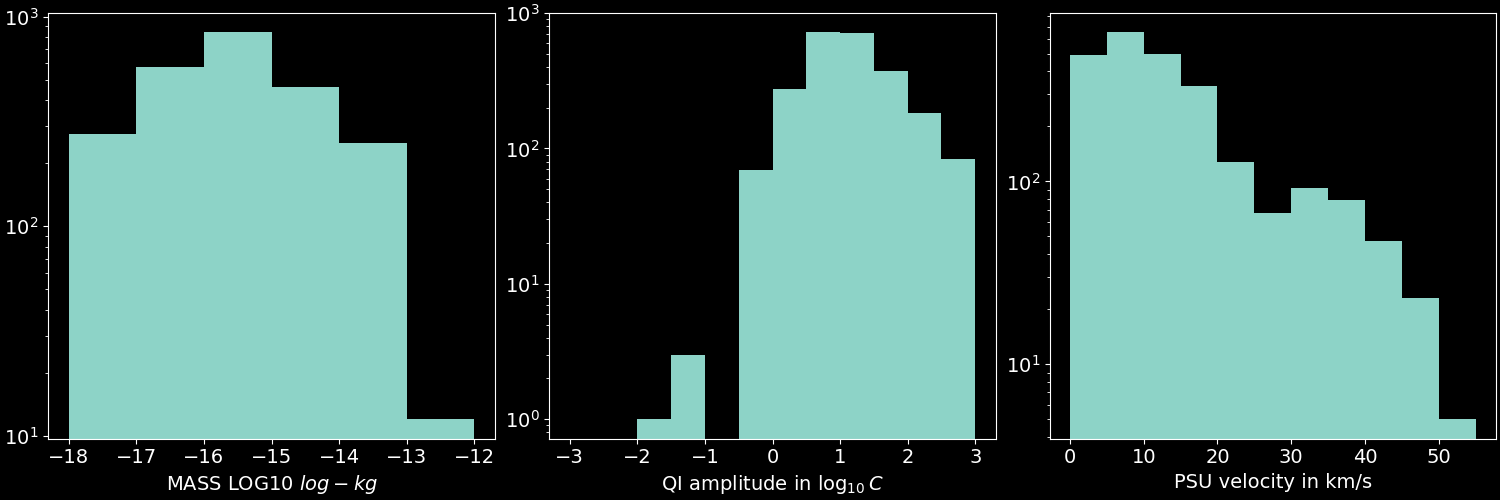

In [63]:
# histograms of distributions before spliting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,
                                    layout="constrained",
                                    sharey=False,
                                    figsize=(15,5))

# add the MASS_LOG10
ax1.hist(iid_qi_cal_df["MASS_LOG10"], bins=np.arange(-18,-11,1))
ax1.set_xlabel("MASS LOG10 " + r"$log-kg$")
ax1.set_yscale("log")

# QI amplitude
ax2.hist(iid_qi_cal_df["QI_LOG10_CHARGE"], bins=np.arange(-3.0,3.5,0.5))
ax2.set_yscale("log")
ax2.set_xlabel("QI amplitude in " + r"$\log_{10} C$")

# psu velocity
ax3.hist(iid_qi_cal_df["PSU_VEL"], bins=np.arange(0, 60, 5))
ax3.set_yscale("log")
ax3.set_xlabel("PSU velocity in km/s")

In [64]:
iid_qi_mass = iid_qi_cal_df[["MASS_LOG10", "QI_LOG10_CHARGE", "PSU_VEL"]].values

iid_qi_mass[0]

array([-16.77866796,   0.94732146,  17.4       ])

In [65]:

# Additionally, shuffle the data to be REALLY sure that there is no "order bias"
np.random.shuffle(iid_qi_mass)

In [66]:
iid_qi_mass

array([[-15.58293881,   0.70394534,  10.05      ],
       [-13.09455456,   2.13769584,   3.02      ],
       [-14.94888273,   1.21199573,   7.03      ],
       ...,
       [-17.40167178,   1.16717846,  37.2       ],
       [-14.53270129,   2.02454724,   7.19      ],
       [-14.58890823,   1.36558719,   5.87      ]])

In [67]:
# split the data in training and testing data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(iid_qi_mass[:,1:],
                                                                            iid_qi_mass[:,:1],
                                                                            test_size=0.2)



In [68]:
X_train

array([[ 1.25055661,  3.31      ],
       [ 1.36558719, 17.04      ],
       [ 1.54502368,  9.9       ],
       ...,
       [ 1.78705929, 14.4       ],
       [ 0.45099847,  8.11      ],
       [ 0.19742392,  5.99      ]])

In [69]:
mass_log10_bins = np.arange(-18,-11,1)
qi_ampl_bins = np.arange(-2.0,3.5,0.5)
psu_vel_bins = np.arange(0, 60, 5)



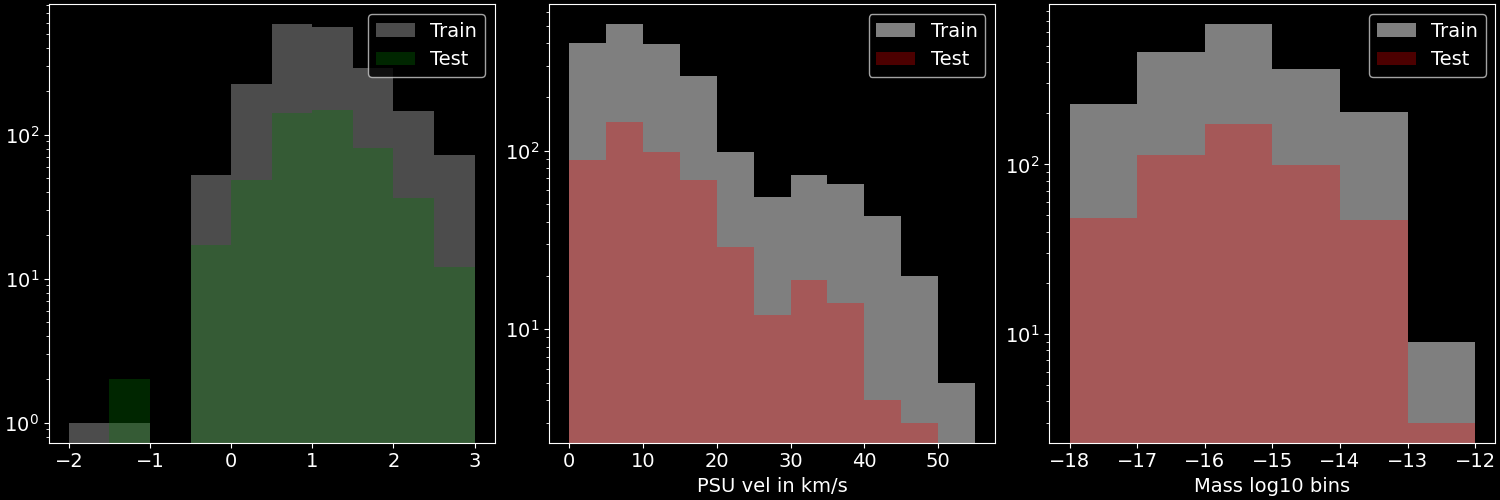

In [70]:
# after spliting unweighted distribution histogram plots


fig, (ax1, ax2, ax3) = plt.subplots(1, 3,
                                    layout="constrained",
                                    sharey=False,
                                    figsize=(15,5))

# Add the QI Amplitude
ax1.hist(X_train[:, 0], bins=qi_ampl_bins, alpha=0.3, color="white", label="Train")
ax1.hist(X_test[:, 0], bins=qi_ampl_bins, alpha=0.3, color="green", label="Test")
ax1.set_yscale("log")
ax2.set_xlabel("QI amplitude in " + r"$\log_{10} fC$")

ax1.legend(loc="upper right")

# Add the psu vel
ax2.hist(X_train[:, 1], bins=psu_vel_bins, alpha=0.5, color="white", label="Train")
ax2.hist(X_test[:, 1], bins=psu_vel_bins, alpha=0.3, color="red", label="Test")
ax2.set_yscale("log")
ax2.set_xlabel("PSU vel in km/s")

ax2.legend(loc="upper right")

# Add the mass log10 bins
ax3.hist(y_train, bins=mass_log10_bins, alpha=0.5, color="white", label="Train")
ax3.hist(y_test, bins=mass_log10_bins, alpha=0.3, color="red", label="Test")
ax3.set_yscale("log")
ax3.set_xlabel("Mass log10 bins")

ax3.legend(loc="upper right")

In [71]:
# shaping for the neural network datasets
print(f"Before reshaping: {y_train.shape}")

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print(f"After reshaping: {y_train.shape}")

Before reshaping: (1935, 1)
After reshaping: (1935, 1)


In [72]:
# standardization
X_scaler = sklearn.preprocessing.StandardScaler()
y_scaler = sklearn.preprocessing.StandardScaler()

X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [73]:
# resulting mean and std of the data
print(f"Mean of the training features: {X_train_scaled.mean(axis=0)}")
print(f"Standard Deviation of the training features: {X_train_scaled.std(axis=0)}")

Mean of the training features: [-6.08425168e-15  2.88497334e-15]
Standard Deviation of the training features: [1. 1.]


# ML train with simple neural network

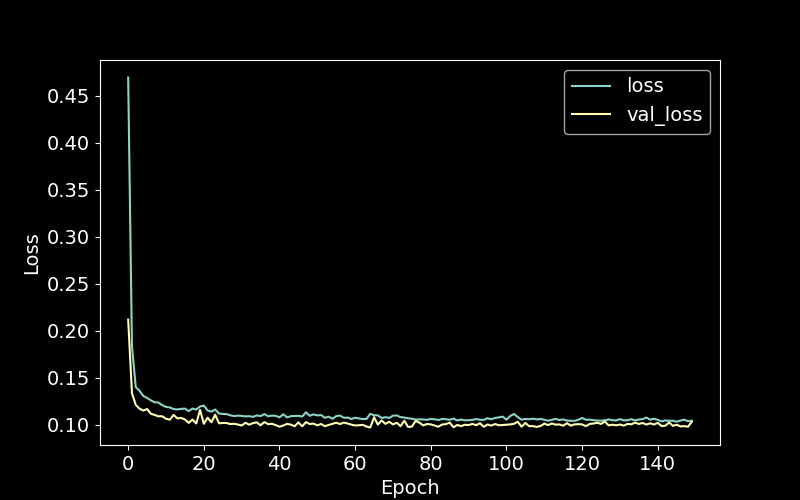

In [74]:
# neural network wirh 2 hidden layers in this first regression

# input shape is 2: psu_vel and amp.
inputs = tf.keras.Input(shape=(2,),
                        name="iid_qi_data",)

# 2 hidden layers
layer = tf.keras.layers.Dense(units=64, activation="relu",)(inputs)
layer = tf.keras.layers.Dense(units=32, activation="relu",)(layer)

# output layer with only 1 unit mapping to get the results of velocity vallues
output = tf.keras.layers.Dense(units=1, name="mass_log10",)(layer)

# we use model API rather than sequential
model = tf.keras.Model(inputs=inputs, outputs=output)

# lots of different losses and metrics
model.compile(optimizer="adam",
            loss=["mean_squared_error"],
            metrics=[tf.keras.metrics.RootMeanSquaredError(),
                    "mean_absolute_error"])

model.fit(x=X_train_scaled,
        y=y_train_scaled,
        batch_size=32,
        epochs=150,
        validation_split=0.25,
        verbose=0)

plt.figure(figsize=(8,5))
plt.plot(model.history.history["loss"], label="loss")
plt.plot(model.history.history["val_loss"], label="val_loss")
plt.xlabel(f"Epoch")
plt.ylabel(f"Loss")
plt.legend()

In [75]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ iid_qi_data (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mass_log10 (Dense)              │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,917 (27.02 KB)

 Trainable params: 2,305 (9.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,612 (18.02 KB)

In [76]:
# evaluating model in the standardized scale
_, mae_scaled, rmse_scaled = model.evaluate(X_test_scaled, y_test_scaled)

rmse = y_scaler.inverse_transform([[rmse_scaled]])
mae = y_scaler.inverse_transform([[mae_scaled]])

print(f"RMSE on test data in log-kg : {rmse[0][0]}")
print(f"MAE on test data in log-kg: {mae[0][0]}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.1333 - mean_absolute_error: 0.2522 - root_mean_squared_error: 0.3634
RMSE on test data in log-kg : -15.301056749570767
MAE on test data in log-kg: -15.189914492328802


In [77]:
# rescaling the data to fit the 3d mesh for a hyperplane passing through
# the values in 3d scatter earlier
min_log10ampl, min_vel = X_scaler.transform([[-2, 2]])[0]
max_log10ampl, max_vel = X_scaler.transform([[4, 36]])[0]


# generate linspaced values in between to fit the grid
log_fc_range_scaled = np.linspace(min_log10ampl,
                                    max_log10ampl,
                                    100)

psu_vel_range_scaled = np.linspace(min_vel,
                                max_vel,
                                100)

log_fc_range_scaled, psu_vel_range_scaled = np.meshgrid(log_fc_range_scaled,
                                                        psu_vel_range_scaled)





In [78]:
psu_vel_range_scaled

array([[-1.09381239, -1.09381239, -1.09381239, ..., -1.09381239,
        -1.09381239, -1.09381239],
       [-1.06123993, -1.06123993, -1.06123993, ..., -1.06123993,
        -1.06123993, -1.06123993],
       [-1.02866746, -1.02866746, -1.02866746, ..., -1.02866746,
        -1.02866746, -1.02866746],
       ...,
       [ 2.06571648,  2.06571648,  2.06571648, ...,  2.06571648,
         2.06571648,  2.06571648],
       [ 2.09828894,  2.09828894,  2.09828894, ...,  2.09828894,
         2.09828894,  2.09828894],
       [ 2.1308614 ,  2.1308614 ,  2.1308614 , ...,  2.1308614 ,
         2.1308614 ,  2.1308614 ]])

In [79]:
np.hstack([log_fc_range_scaled, psu_vel_range_scaled])

array([[-4.3146913 , -4.23195085, -4.14921041, ..., -1.09381239,
        -1.09381239, -1.09381239],
       [-4.3146913 , -4.23195085, -4.14921041, ..., -1.06123993,
        -1.06123993, -1.06123993],
       [-4.3146913 , -4.23195085, -4.14921041, ..., -1.02866746,
        -1.02866746, -1.02866746],
       ...,
       [-4.3146913 , -4.23195085, -4.14921041, ...,  2.06571648,
         2.06571648,  2.06571648],
       [-4.3146913 , -4.23195085, -4.14921041, ...,  2.09828894,
         2.09828894,  2.09828894],
       [-4.3146913 , -4.23195085, -4.14921041, ...,  2.1308614 ,
         2.1308614 ,  2.1308614 ]])

In [87]:
# plotting the z-axis with the help of meshgrid
log_fc_range = []
psu_vel_range = []
pred_mass = []

for _fc, _vel in zip(log_fc_range_scaled, psu_vel_range_scaled):
     stacked_scaled = np.hstack([_fc.reshape(-1,1),
                                _vel.reshape(-1,1)])

     # rise time and log_fc scalings
     log_fc_range.append(X_scaler.inverse_transform(stacked_scaled)[:, 0])
     psu_vel_range.append(X_scaler.inverse_transform(stacked_scaled)[:,1])

     # pred. vel. stacked scaling
     temp_results = model.predict(x=stacked_scaled)
     pred_mass.append(y_scaler.inverse_transform(temp_results.reshape(1,-1))[0])

pred_mass = np.array(pred_mass)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

In [81]:
stacked_scaled[0]

array([-4.3146913,  2.1308614])

In [82]:
iid_qi_cal_df

,PSU_VEL,PSU_CHARGE,MP_PEAKS,ACC,QI_CHARGE,QI_TR,QC_CHARGE,QC_TR,QT_CHARGE,QT_TR,TAR,MASS,QI_LOG10_CHARGE,MASS_LOG10
0,17.40,1.260,3,2000000,8.857710,2.83,43.1122,2.33,4.52835,0.00,CAT,1.664685e-17,0.947321,-16.778668
1,12.35,0.990,0,2000000,8.392480,8.16,243.3150,0.66,4.80513,0.00,CAT,2.596338e-17,0.923890,-16.585639
2,18.70,2.030,3,2000000,3.897020,4.00,47.3741,1.83,3.50657,0.00,CAT,2.322057e-17,0.590733,-16.634127
3,29.10,2.058,6,2000000,102.422000,4.33,496.7530,0.33,23.11490,1.33,CAT,9.721189e-18,2.010393,-17.012281
4,11.00,2.030,0,2000000,0.781009,1.33,42.1289,1.50,4.81273,0.00,CAT,6.710744e-17,-0.107344,-16.173229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,9.68,2.429,7,2000000,10.227700,2.84,166.8690,1.83,4.71384,0.00,CAT,1.036900e-16,1.009778,-15.984263
4205,14.78,0.990,9,2000000,25.061000,2.83,219.0310,1.33,5.48485,0.00,CAT,1.812785e-17,1.398998,-16.741654
4206,14.89,0.990,4,2000000,7.616550,3.33,42.1660,1.17,4.70756,0.00,CAT,1.786100e-17,0.881758,-16.748094
4207,12.29,2.506,6,2000000,30.925100,5.34,261.7860,1.00,5.88237,0.00,CAT,6.636472e-17,1.490311,-16.178063


In [83]:
psu_vel_range

[array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]),
 array([2.34343434, 2.34343434, 2.34343434, 2.34343434, 2.34343434,
        2.34343434, 2.34343434, 2.34343434, 2.34343434, 2.34343434,
        2.34343434, 2.34343434, 2.34343434, 2.34343434, 2.34343434,
        2.34343434, 2.34343434, 2.34343434, 2.34343434, 2.34343434,
        2.34343434, 2.34343434, 2.34343434, 2.34343434, 2.34343434,
        2.34343434, 2.34343434, 2.34343434, 2.34343434, 2.34343434,
        2.34343434, 2.34343434, 2.34343434, 2.34343434, 2.34343434,
        2.34343434, 2.34343434, 2.34343434, 2.34343434, 2.34343434,
      

In [95]:
pred_mass.shape

(100, 100)

In [94]:
log_fc_range

[array([-2.00000000e+00, -1.93939394e+00, -1.87878788e+00, -1.81818182e+00,
        -1.75757576e+00, -1.69696970e+00, -1.63636364e+00, -1.57575758e+00,
        -1.51515152e+00, -1.45454545e+00, -1.39393939e+00, -1.33333333e+00,
        -1.27272727e+00, -1.21212121e+00, -1.15151515e+00, -1.09090909e+00,
        -1.03030303e+00, -9.69696970e-01, -9.09090909e-01, -8.48484848e-01,
        -7.87878788e-01, -7.27272727e-01, -6.66666667e-01, -6.06060606e-01,
        -5.45454545e-01, -4.84848485e-01, -4.24242424e-01, -3.63636364e-01,
        -3.03030303e-01, -2.42424242e-01, -1.81818182e-01, -1.21212121e-01,
        -6.06060606e-02, -2.22044605e-16,  6.06060606e-02,  1.21212121e-01,
         1.81818182e-01,  2.42424242e-01,  3.03030303e-01,  3.63636364e-01,
         4.24242424e-01,  4.84848485e-01,  5.45454545e-01,  6.06060606e-01,
         6.66666667e-01,  7.27272727e-01,  7.87878788e-01,  8.48484848e-01,
         9.09090909e-01,  9.69696970e-01,  1.03030303e+00,  1.09090909e+00,
         1.1

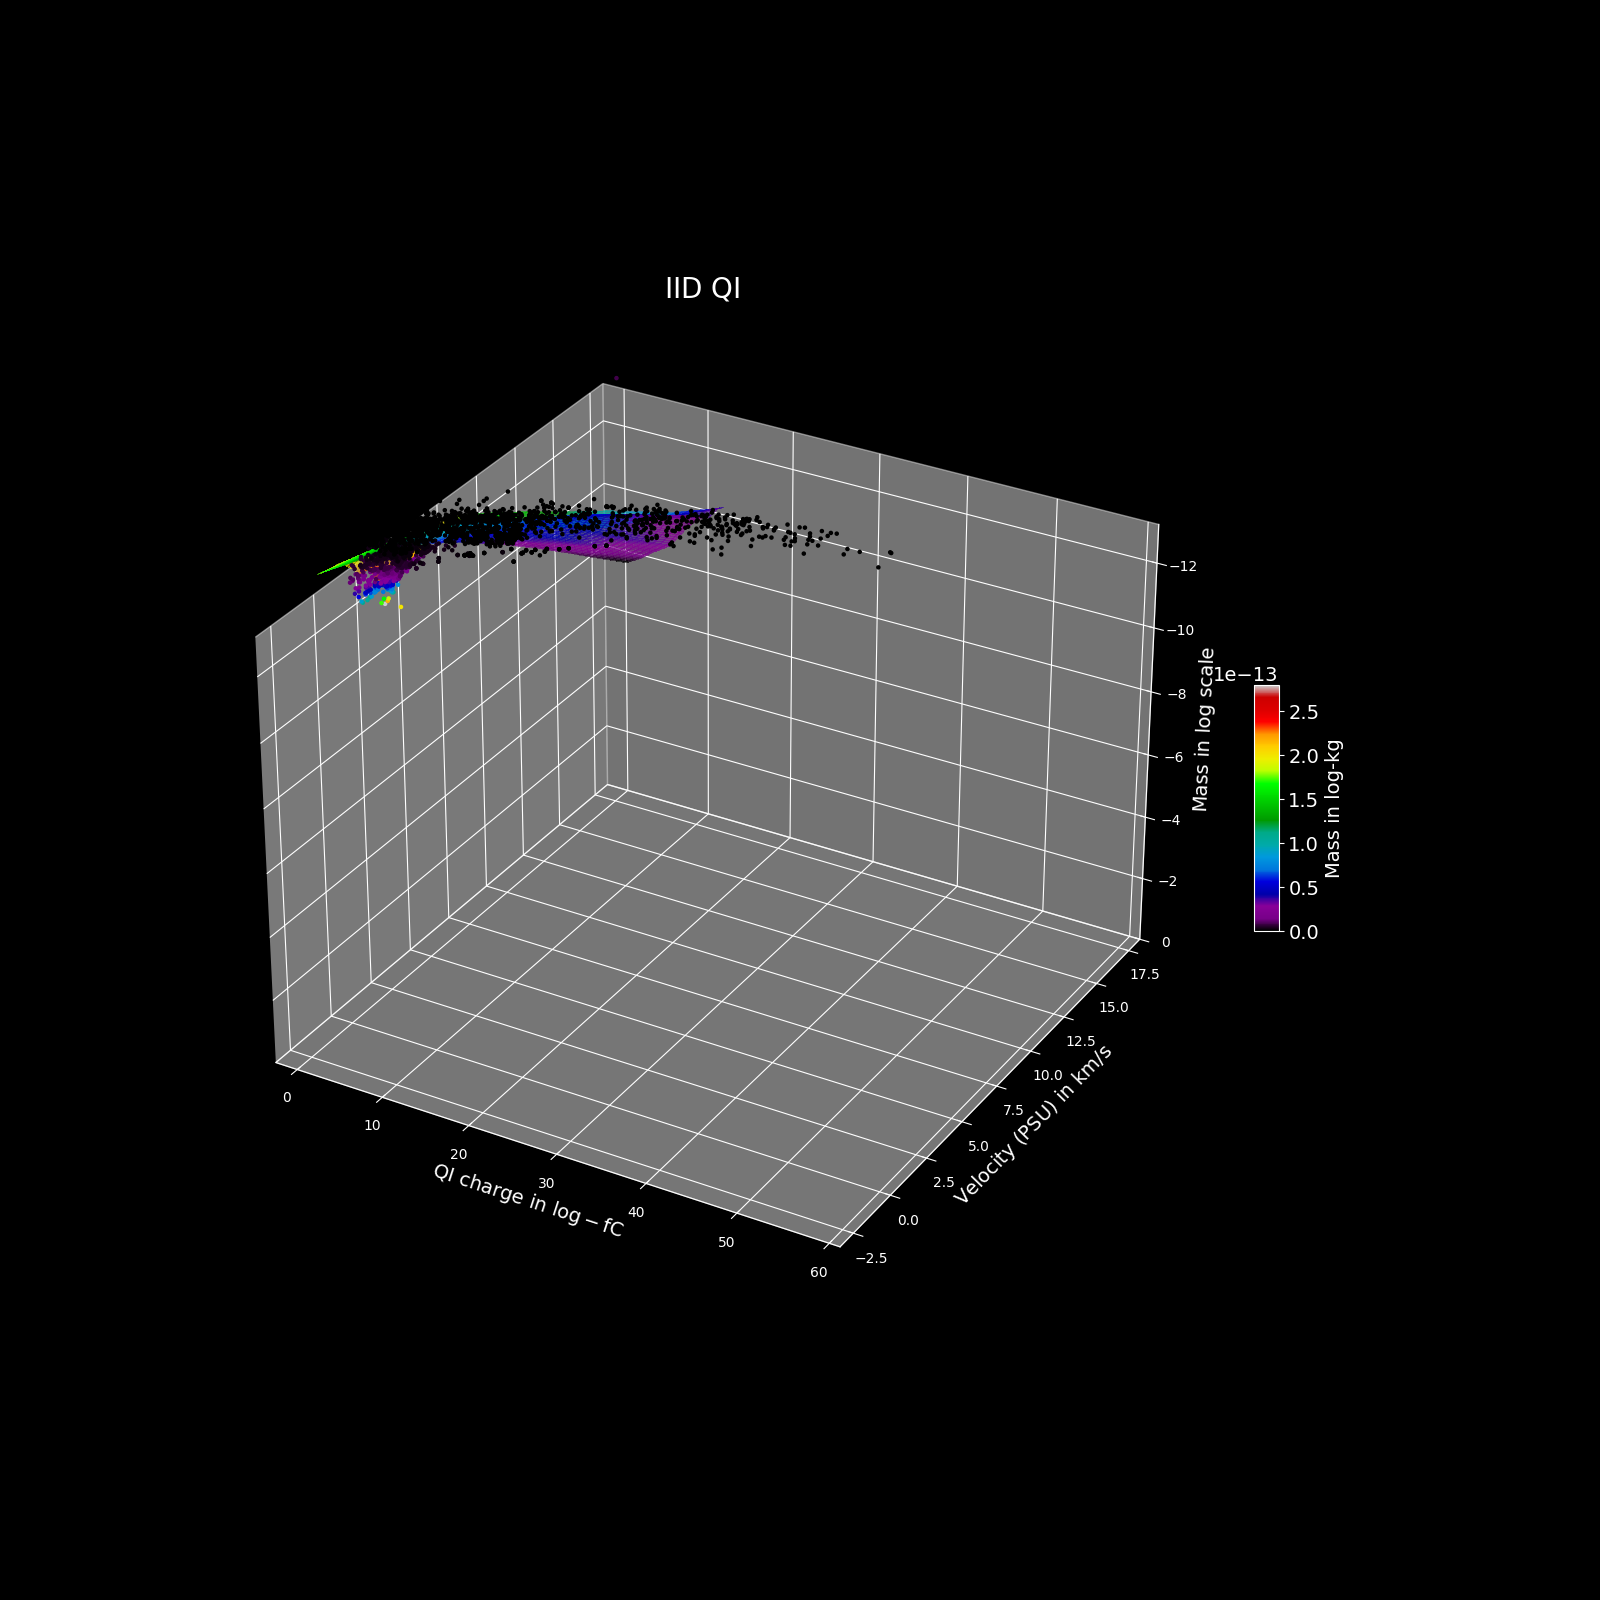

In [99]:

%matplotlib widget
# cat mass vs psu vel vs qi charge
ch = "QI"

fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(1, 1, 1, projection='3d')

# scatter plot with log10 charges
sc = ax.scatter(iid_qi_cal_df["PSU_VEL"],
                np.log10(iid_qi_cal_df[ch + "_CHARGE"]),
                (np.log10(iid_qi_cal_df["MASS"])),
                c=(iid_qi_cal_df["MASS"]),
                cmap="nipy_spectral",
                vmin=0,
                vmax=np.max(iid_qi_cal_df["MASS"]),
                marker=".",
                alpha=1,
                zorder=0)

# some titles and labels
ax.set_title(rf"$\mathrm{{IID\ {ch}}}$", fontsize=20)
ax.set_ylabel(rf"$\mathrm{{Velocity\ (PSU)\ in\ km/s}}$", fontsize=14)
ax.set_xlabel(rf"$\mathrm{{{ch}\ charge\ in\ log-fC}}$", fontsize=14)
ax.set_zlabel(rf"$\mathrm{{Mass\ in\ log\ scale}}$", fontsize=14)

ax.set_zlim(0, 1.05 * np.max(np.log10(iid_qi_cal_df["MASS"])))
ax.tick_params(labelsize=10)

# add a regression line
ax.plot_surface(psu_vel_range,
                log_fc_range,
                pred_mass,
                cmap="nipy_spectral",
                linewidth=0,
                antialiased=False,
                alpha=0.5)

# create a colorbar
cbar = fig.colorbar(sc,
                    shrink=0.2,
                    aspect=10,
                    orientation="vertical",
                    pad=0.04)

cbar.ax.tick_params(labelsize=14)
cbar.set_label(label=r"Mass in log-kg",
                size=14)

plt.show()
